In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/AI


/content/drive/MyDrive/AI


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('WHR.csv')  # Load your dataset

In [ ]:
print("First 10 rows of the WHR_Index dataset:")
df.head(10)

First 10 rows of the WHR_Index dataset:


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


In [ ]:
print(df.shape)  # Outputs (rows, columns)

(143, 9)


In [ ]:
print(df.dtypes)

Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


In [ ]:
print(df['score'].mean())
print(df['score'].median())
print(df['score'].std())

5.52758041958042
5.785
1.1707165099442995


In [ ]:
highest_score_country = df.loc[df['score'].idxmax(), 'Country name']
lowest_score_country = df.loc[df['score'].idxmin(), 'Country name']

highest_score = df['score'].max()
lowest_score = df['score'].min()

print("\nCountries with the highest and lowest happiness scores:")
print(f"Highest: {highest_score_country} (Score: {highest_score})")
print(f"Lowest: {lowest_score_country} (Score: {lowest_score})")


Countries with the highest and lowest happiness scores:
Highest: Finland (Score: 7.741)
Lowest: Afghanistan (Score: 1.721)


In [ ]:
print("Missing Values in Each Column:")
missing_values = df.isnull().sum()
print(missing_values)

Missing Values in Each Column:
Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


In [ ]:
filtered_df = df[df['score'] > 7.5]
print("Countries with Score greater than 7.5:")
filtered_df.head()

Countries with Score greater than 7.5:


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050


In [ ]:
sorted_df = df.sort_values(by='Log GDP per capita', ascending=False)
print("\nTop 10 rows of countries sorted by GDP per Capita:")
sorted_df.head(10)


Top 10 rows of countries sorted by GDP per Capita:


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
16,Ireland,6.838,2.129,1.390,0.700,0.758,0.205,0.418,1.239
29,Singapore,6.523,2.118,1.361,0.769,0.743,0.168,0.575,0.788
21,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
22,United States,6.725,1.939,1.392,0.542,0.586,0.223,0.169,1.873
85,Hong Kong S.A.R. of China,5.316,1.909,1.184,0.857,0.485,0.147,0.402,0.333
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906


In [ ]:
def categorize_happiness(score):
    if score < 4:
        return 'Low'
    elif 4 <= score <= 6:
        return 'Medium'
    else:
        return 'High'

df['Happiness Category'] = df['score'].apply(categorize_happiness)

print("\nDataset with new column 'Happiness Category':")
print(df[['Country name', 'score', 'Happiness Category']].head(143))


Dataset with new column 'Happiness Category':
         Country name  score Happiness Category
0             Finland  7.741               High
1             Denmark  7.583               High
2             Iceland  7.525               High
3              Sweden  7.344               High
4              Israel  7.341               High
..                ...    ...                ...
138  Congo (Kinshasa)  3.295                Low
139      Sierra Leone  3.245                Low
140           Lesotho  3.186                Low
141           Lebanon  2.707                Low
142       Afghanistan  1.721                Low

[143 rows x 3 columns]


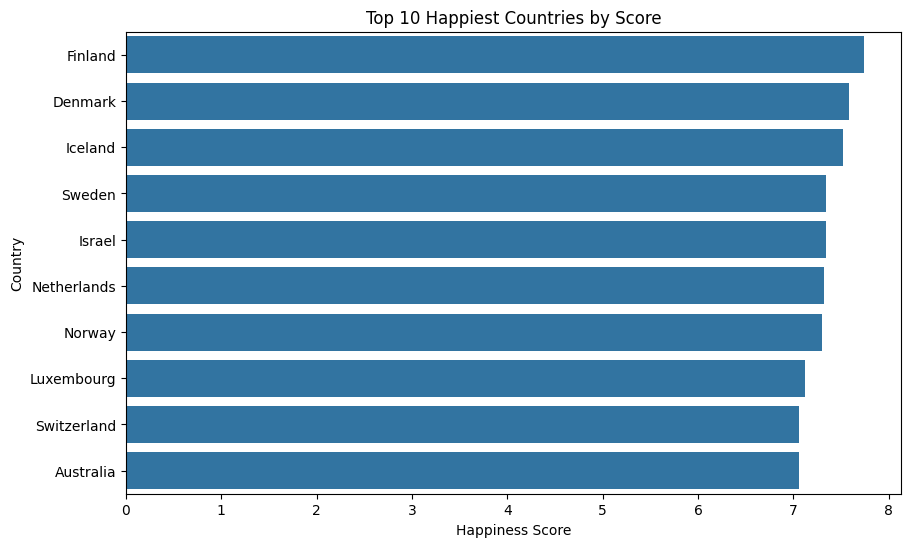

In [ ]:
top_10_happiest = df.sort_values(by='score', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='Country name', data=top_10_happiest)
plt.title('Top 10 Happiest Countries by Score')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.show()

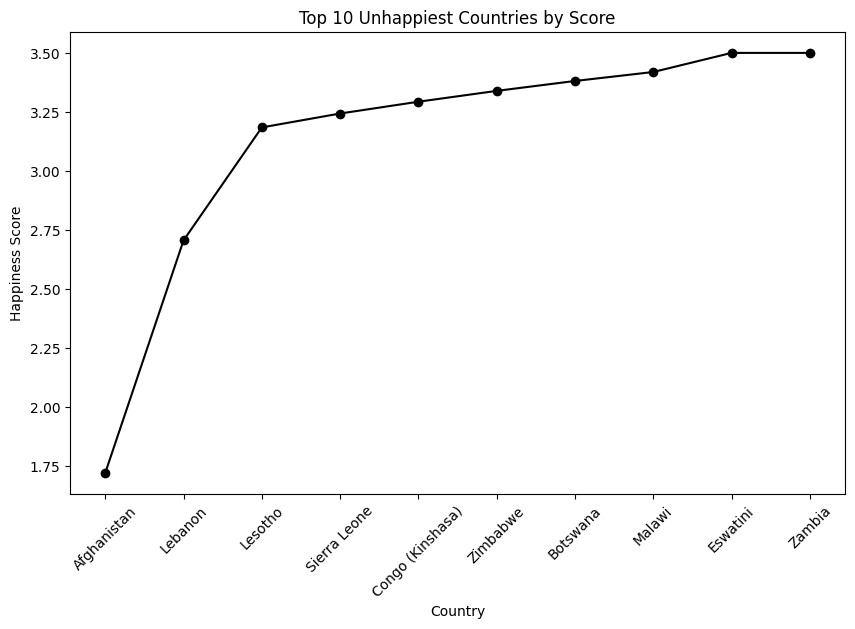

In [ ]:
top_10_unhappiest = df.sort_values(by='score').head(10)

plt.figure(figsize=(10, 6))
plt.plot(top_10_unhappiest['Country name'], top_10_unhappiest['score'], marker='o', linestyle='-', color='black')
plt.title('Top 10 Unhappiest Countries by Score')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)
plt.show()

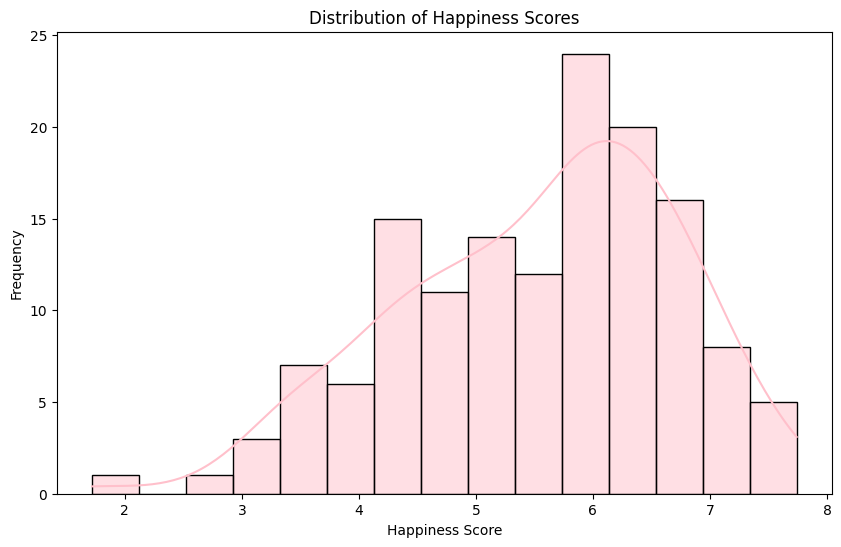

The histogram shows how happiness scores are distributed. 
If the scores are concentrated on the right, most countries are happy; if on the left, most are unhappy.


In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['score'], bins=15, kde=True, color='pink')
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()

print("The histogram shows how happiness scores are distributed. \nIf the scores are concentrated on the right, most countries are happy; if on the left, most are unhappy.")

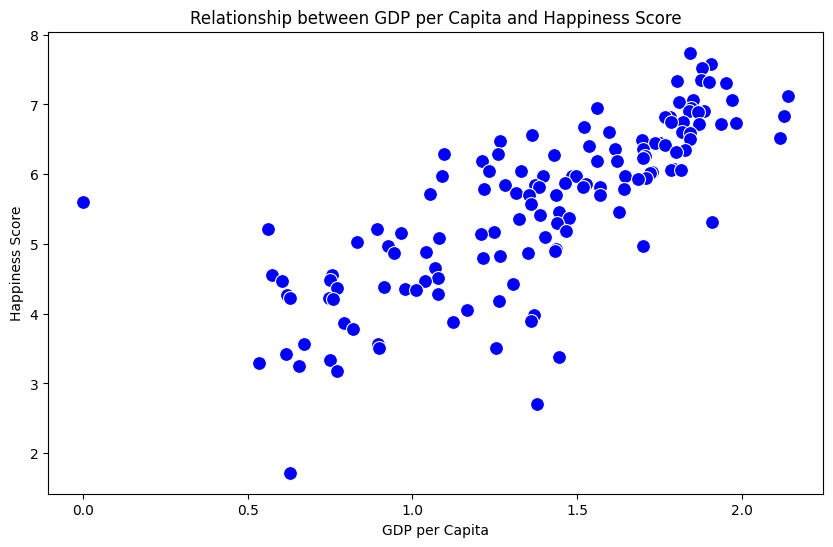

The scatter plot helps visualize the relationship between GDP per Capita and Happiness Score. 
If there's a positive trend, it indicates that higher GDP correlates with higher happiness.


In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=df, color='blue', s=100)
plt.title('Relationship between GDP per Capita and Happiness Score')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()

print("The scatter plot helps visualize the relationship between GDP per Capita and Happiness Score. \nIf there's a positive trend, it indicates that higher GDP correlates with higher happiness.")

In [ ]:
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

In [ ]:
south_asia_df = df[df['Country name'].isin(south_asian_countries)]


In [ ]:
print("Filtered South Asia Dataset:")
south_asia_df


Filtered South Asia Dataset:


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low


In [ ]:
bhutan_exists = 'Bhutan' in df['Country name'].values

bhutan_exists

False

In [ ]:
maldives_exists = 'Maldives' in df['Country name'].values

maldives_exists

False

In [ ]:
output_file_path = 'south_asia_dataset.csv'
south_asia_df.to_csv(output_file_path, index=False)

print(f"Filtered South Asian dataset saved successfully as '{output_file_path}'!")

Filtered South Asian dataset saved successfully as 'south_asia_dataset.csv'!


In [ ]:
south_asia_df.loc[:,'Composite Score'] = (
    0.40 * south_asia_df['Log GDP per capita'] +
    0.30 * south_asia_df['Social support'] +
    0.30 * south_asia_df['Healthy life expectancy']
)

In [ ]:
ranked_south_asia_df = south_asia_df.sort_values(by='Composite Score', ascending=False).reset_index(drop=True)


In [ ]:
print("Ranked South Asian Countries by Composite Score:")
print(ranked_south_asia_df[['Country name', 'Composite Score']])

Ranked South Asian Countries by Composite Score:
  Country name  Composite Score
0    Sri Lanka           1.0739
1        Nepal           0.8159
2        India           0.7874
3     Pakistan           0.7039
4   Bangladesh           0.6774
5  Afghanistan           0.3238


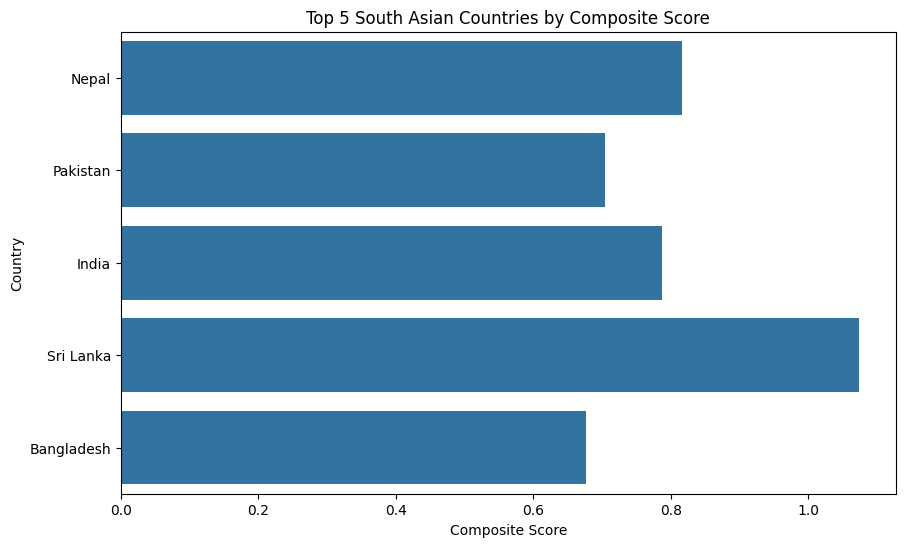

In [ ]:
top_5_countries = south_asia_df.head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x='Composite Score', y='Country name', data=top_5_countries)
plt.title('Top 5 South Asian Countries by Composite Score')
plt.xlabel('Composite Score')
plt.ylabel('Country')
plt.show()

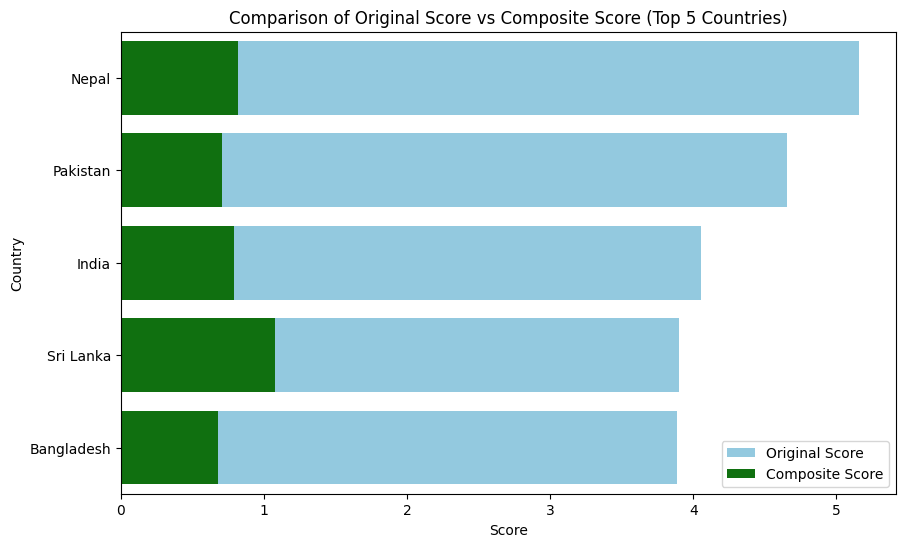

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='Country name', data=top_5_countries, color='skyblue', label='Original Score')
sns.barplot(x='Composite Score', y='Country name', data=top_5_countries, color='green', label='Composite Score')
plt.title('Comparison of Original Score vs Composite Score (Top 5 Countries)')
plt.xlabel('Score')
plt.ylabel('Country')
plt.legend()
plt.show()

In [ ]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)], lower_bound, upper_bound

In [ ]:
score_outliers, score_lower, score_upper = detect_outliers(south_asia_df, 'score')


In [ ]:
gdp_outliers, gdp_lower, gdp_upper = detect_outliers(south_asia_df, 'Log GDP per capita')


In [ ]:
combined_outliers = pd.concat([score_outliers, gdp_outliers]).drop_duplicates()


In [ ]:
print("Outlier Countries based on Score and GDP per Capita:")
print(combined_outliers[['Country name', 'score', 'Log GDP per capita']])

Outlier Countries based on Score and GDP per Capita:
    Country name  score  Log GDP per capita
142  Afghanistan  1.721               0.628


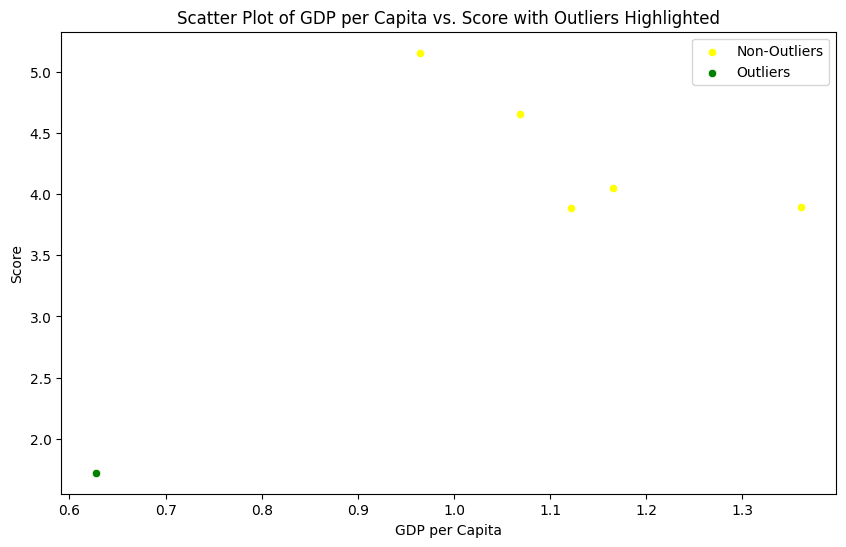

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Log GDP per capita', y='score',
    data=south_asia_df,
    color='yellow', label='Non-Outliers'
)

sns.scatterplot(
    x='Log GDP per capita', y='score',
    data=combined_outliers,
    color='green', label='Outliers'
)

plt.title('Scatter Plot of GDP per Capita vs. Score with Outliers Highlighted')
plt.xlabel('GDP per Capita')
plt.ylabel('Score')
plt.legend()
plt.show()

In [ ]:
print("Discussion:")
print(f"The Score outliers are countries with scores below {score_lower:.2f} or above {score_upper:.2f}.")
print(f"The GDP per Capita outliers are countries with GDP below {gdp_lower:.2f} or above {gdp_upper:.2f}.")
print("These outliers might skew regional averages, as extreme values have a significant impact on mean calculations.")

Discussion:
The Score outliers are countries with scores below 2.96 or above 5.43.
The GDP per Capita outliers are countries with GDP below 0.74 or above 1.40.
These outliers might skew regional averages, as extreme values have a significant impact on mean calculations.


In [ ]:
freedom_corr = south_asia_df['Freedom to make life choices'].corr(south_asia_df['score'])
generosity_corr = south_asia_df['Generosity'].corr(south_asia_df['score'])

print("Pearson Correlation :")
print(f"Freedom to Make Life Choices vs Score: {freedom_corr:.2f}")
print(f"Generosity vs Score: {generosity_corr:.2f}")

Pearson Correlation :
Freedom to Make Life Choices vs Score: 0.80
Generosity vs Score: 0.87


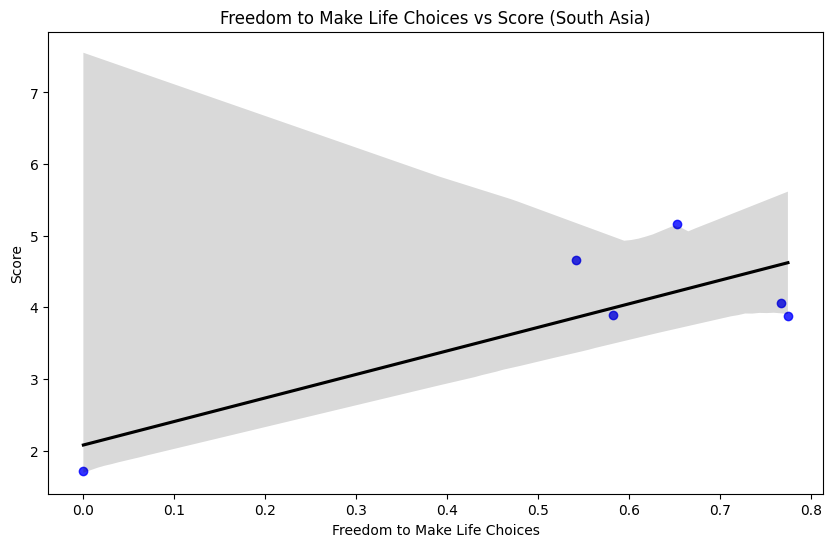

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(
    x='Freedom to make life choices',
    y='score',
    data=south_asia_df,
    scatter_kws={'color': 'blue'},
    line_kws={'color': 'black'}
)
plt.title('Freedom to Make Life Choices vs Score (South Asia)')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')
plt.show()

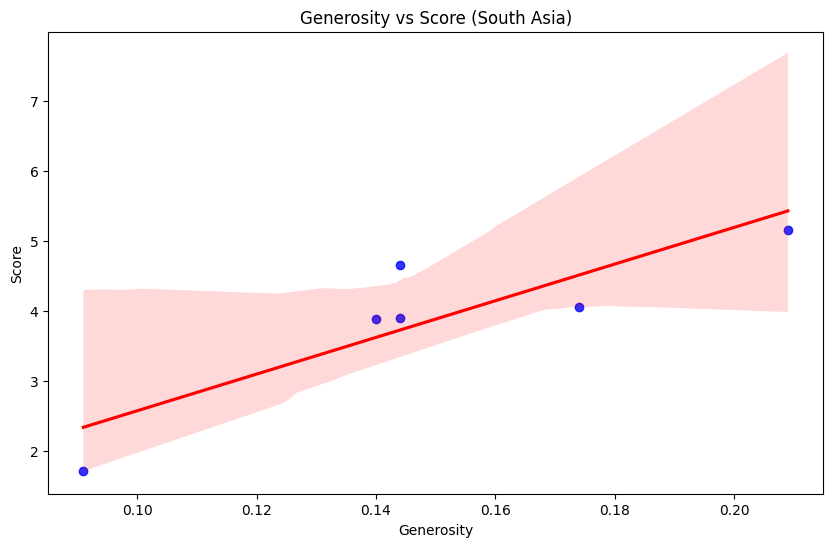

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(
    x='Generosity',
    y='score',
    data=south_asia_df,
    scatter_kws={'color': 'blue'},
    line_kws={'color': 'red'}
)
plt.title('Generosity vs Score (South Asia)')
plt.xlabel('Generosity')
plt.ylabel('Score')
plt.show()

In [ ]:
if abs(freedom_corr) > abs(generosity_corr):
    print("Freedom to Make Life Choices has the strongest relationship with the Score.")
else:
    print("Generosity has the strongest relationship with the Score.")

print("Summary:")
print("1. A higher absolute value of the Pearson correlation indicates a stronger relationship.")
print("2. Positive correlations suggest that as the metric increases, the Score tends to increase.")
print("3. Negative correlations suggest an inverse relationship.")

Generosity has the strongest relationship with the Score.
Summary:
1. A higher absolute value of the Pearson correlation indicates a stronger relationship.
2. Positive correlations suggest that as the metric increases, the Score tends to increase.
3. Negative correlations suggest an inverse relationship.


In [ ]:
south_asia_df.loc[:,'GDP-Score Gap'] = south_asia_df['Log GDP per capita'] - south_asia_df['score']


In [ ]:
ascending_gap = south_asia_df.sort_values(by='GDP-Score Gap', ascending=True)
descending_gap = south_asia_df.sort_values(by='GDP-Score Gap', ascending=False)

In [ ]:
print("South Asian countries ranked by GDP-Score Gap (Ascending):")
print(ascending_gap[['Country name', 'Log GDP per capita', 'score', 'GDP-Score Gap']])


South Asian countries ranked by GDP-Score Gap (Ascending):
    Country name  Log GDP per capita  score  GDP-Score Gap
92         Nepal               0.965  5.158         -4.193
107     Pakistan               1.069  4.657         -3.588
125        India               1.166  4.054         -2.888
128   Bangladesh               1.122  3.886         -2.764
127    Sri Lanka               1.361  3.898         -2.537
142  Afghanistan               0.628  1.721         -1.093


In [ ]:
print("\nSouth Asian countries ranked by GDP-Score Gap (Descending):")
print(descending_gap[['Country name', 'Log GDP per capita', 'score', 'GDP-Score Gap']])



South Asian countries ranked by GDP-Score Gap (Descending):
    Country name  Log GDP per capita  score  GDP-Score Gap
142  Afghanistan               0.628  1.721         -1.093
127    Sri Lanka               1.361  3.898         -2.537
128   Bangladesh               1.122  3.886         -2.764
125        India               1.166  4.054         -2.888
107     Pakistan               1.069  4.657         -3.588
92         Nepal               0.965  5.158         -4.193


In [ ]:
top_positive_gap = descending_gap.head(3)
top_negative_gap = ascending_gap.head(3)

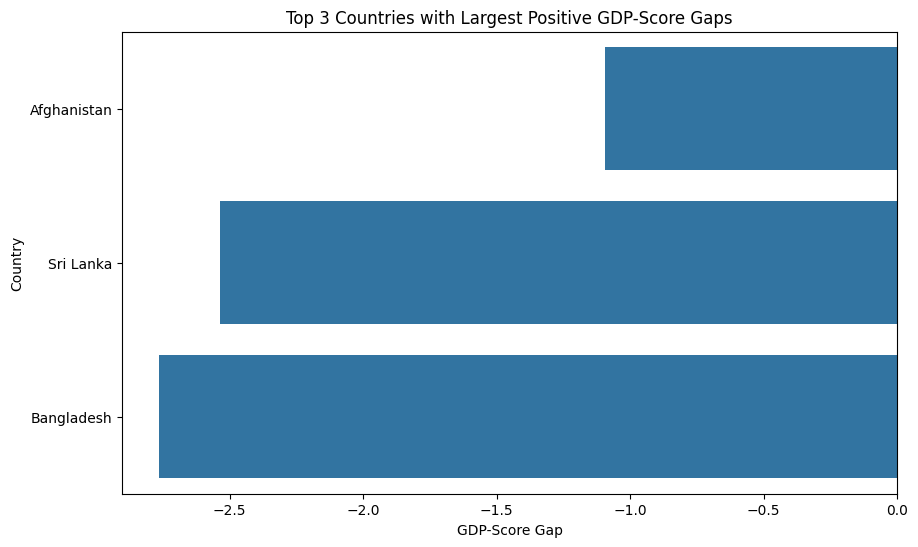

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='GDP-Score Gap',
    y='Country name',
    data=top_positive_gap,
)
plt.title('Top 3 Countries with Largest Positive GDP-Score Gaps')
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country')
plt.show()


In [ ]:
print("Analysis:")
print("""
1. Countries with a large positive gap have a significantly higher GDP per Capita compared to their Score.
   This suggests that economic wealth does not necessarily translate to higher happiness.
2. Countries with a large negative gap have relatively lower GDP per Capita but still maintain a higher happiness score.
   This indicates that factors other than GDP, such as social support and freedom, may be influencing happiness.
3. Understanding these gaps helps policymakers identify areas where economic growth might not be directly improving well-being.
""")

Analysis:

1. Countries with a large positive gap have a significantly higher GDP per Capita compared to their Score.
   This suggests that economic wealth does not necessarily translate to higher happiness.
2. Countries with a large negative gap have relatively lower GDP per Capita but still maintain a higher happiness score.
   This indicates that factors other than GDP, such as social support and freedom, may be influencing happiness.
3. Understanding these gaps helps policymakers identify areas where economic growth might not be directly improving well-being.



In [ ]:
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia",
    "Syria", "United Arab Emirates", "Yemen"
]

In [ ]:
middle_east_df = df[df['Country name'].isin(middle_east_countries)]


In [ ]:
print("Middle Eastern Countries Dataset:")
middle_east_df

Middle Eastern Countries Dataset:


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High
12,Kuwait,6.951,1.845,1.364,0.661,0.827,0.200,0.172,1.884,High
21,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741,High
27,Saudi Arabia,6.594,1.842,1.361,0.511,0.787,0.114,0.188,1.790,High
61,Bahrain,5.959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium
91,Iraq,5.166,1.249,0.996,0.498,0.425,0.141,0.048,1.809,Medium
99,Iran,4.923,1.435,1.136,0.571,0.366,0.235,0.123,1.057,Medium
124,Jordan,4.186,1.262,0.983,0.594,0.593,0.059,0.189,0.504,Medium
132,Yemen,3.561,0.671,1.281,0.293,0.362,0.080,0.113,0.760,Low
141,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,Low


In [ ]:
output_file = 'middle_east_dataset.csv'
middle_east_df.to_csv(output_file, index=False)
print(f"\nMiddle Eastern dataset saved as '{output_file}'.")


Middle Eastern dataset saved as 'middle_east_dataset.csv'.


In [ ]:
south_asia_mean = south_asia_df['score'].mean()
south_asia_std = south_asia_df['score'].std()

middle_east_mean = middle_east_df['score'].mean()
middle_east_std = middle_east_df['score'].std()

In [ ]:
print("Descriptive Statistics for South Asia:")
print(f"Mean Score: {south_asia_mean:.2f}")
print(f"Standard Deviation: {south_asia_std:.2f}\n")

print("Descriptive Statistics for Middle East:")
print(f"Mean Score: {middle_east_mean:.2f}")
print(f"Standard Deviation: {middle_east_std:.2f}\n")

Descriptive Statistics for South Asia:
Mean Score: 3.90
Standard Deviation: 1.18

Descriptive Statistics for Middle East:
Mean Score: 5.41
Standard Deviation: 1.57



In [ ]:
if south_asia_mean > middle_east_mean:
    print("South Asia has a higher average happiness score.")
else:
    print("Middle East has a higher average happiness score.")

Middle East has a higher average happiness score.


In [ ]:
south_asia_top3 = south_asia_df.nlargest(3, 'score')
south_asia_bottom3 = south_asia_df.nsmallest(3, 'score')

middle_east_top3 = middle_east_df.nlargest(3, 'score')
middle_east_bottom3 = middle_east_df.nsmallest(3, 'score')

In [ ]:
south_asia_combined = pd.concat([south_asia_top3, south_asia_bottom3])
middle_east_combined = pd.concat([middle_east_top3, middle_east_bottom3])

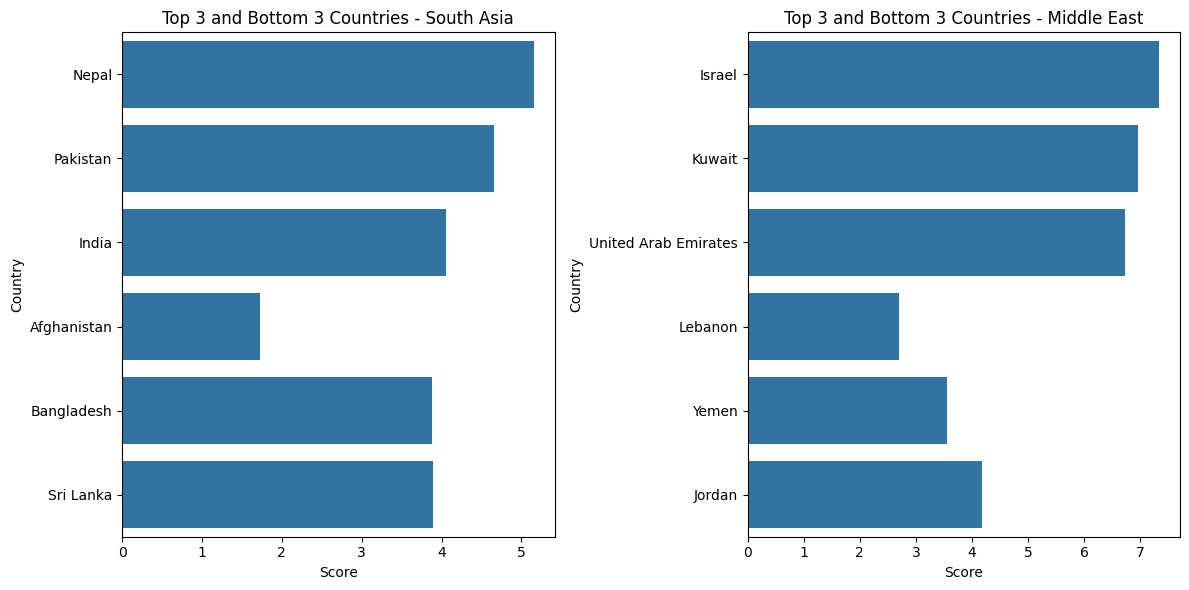

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='score', y='Country name', data=south_asia_combined)
plt.title('Top 3 and Bottom 3 Countries - South Asia')
plt.xlabel('Score')
plt.ylabel('Country')

plt.subplot(1, 2, 2)
sns.barplot(x='score', y='Country name', data=middle_east_combined)
plt.title('Top 3 and Bottom 3 Countries - Middle East')
plt.xlabel('Score')
plt.ylabel('Country')

plt.tight_layout()
plt.show()

In [ ]:
metrics_columns = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']


In [ ]:
south_asia_metrics = south_asia_df[metrics_columns]
middle_east_metrics = middle_east_df[metrics_columns]

In [ ]:
south_asia_metrics.loc[:,'Region'] = 'South Asia'
middle_east_metrics.loc[:,'Region'] = 'Middle East'


In [ ]:
combined_df = pd.concat([south_asia_metrics, middle_east_metrics])


In [ ]:
combined_df['Log GDP per capita'] = pd.to_numeric(combined_df['Log GDP per capita'], errors='coerce')
combined_df['Social support'] = pd.to_numeric(combined_df['Social support'], errors='coerce')
combined_df['Healthy life expectancy'] = pd.to_numeric(combined_df['Healthy life expectancy'], errors='coerce')

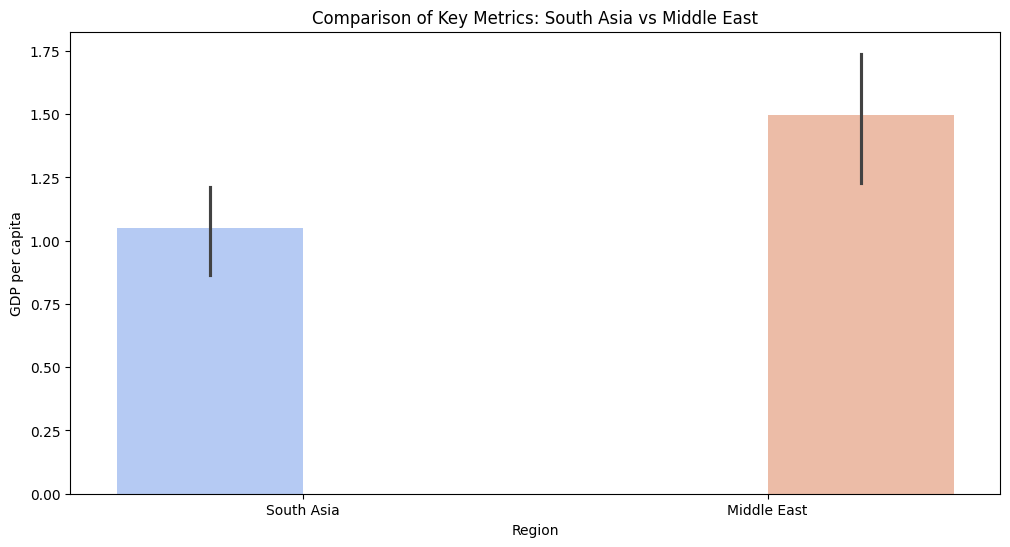

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Log GDP per capita', data=combined_df, hue='Region', palette='coolwarm', dodge=True)
plt.title('Comparison of Key Metrics: South Asia vs Middle East')
plt.ylabel('GDP per capita')
plt.xlabel('Region')

plt.show()

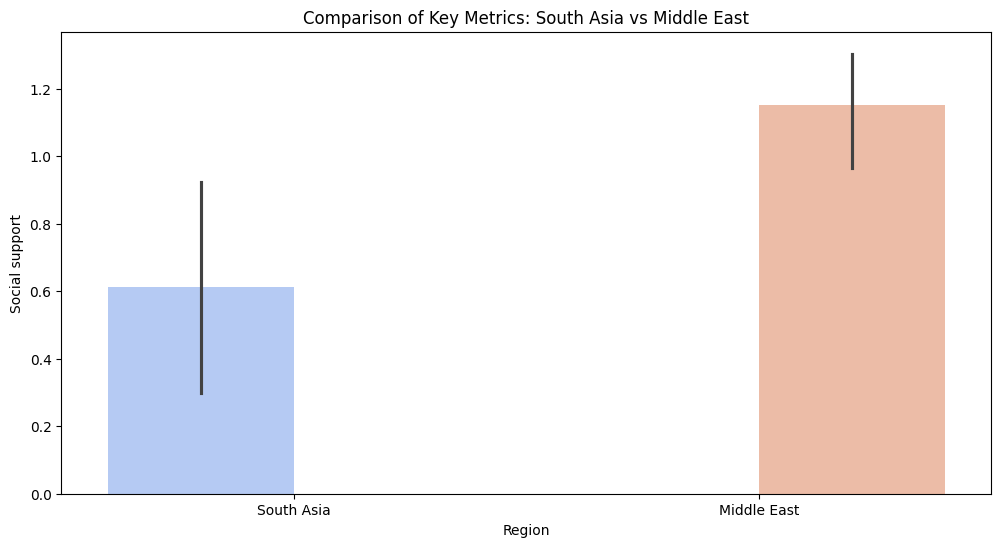

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Social support', data=combined_df, hue='Region', palette='coolwarm', dodge=True)
plt.title('Comparison of Key Metrics: South Asia vs Middle East')
plt.ylabel('Social support')
plt.xlabel('Region')

plt.show()

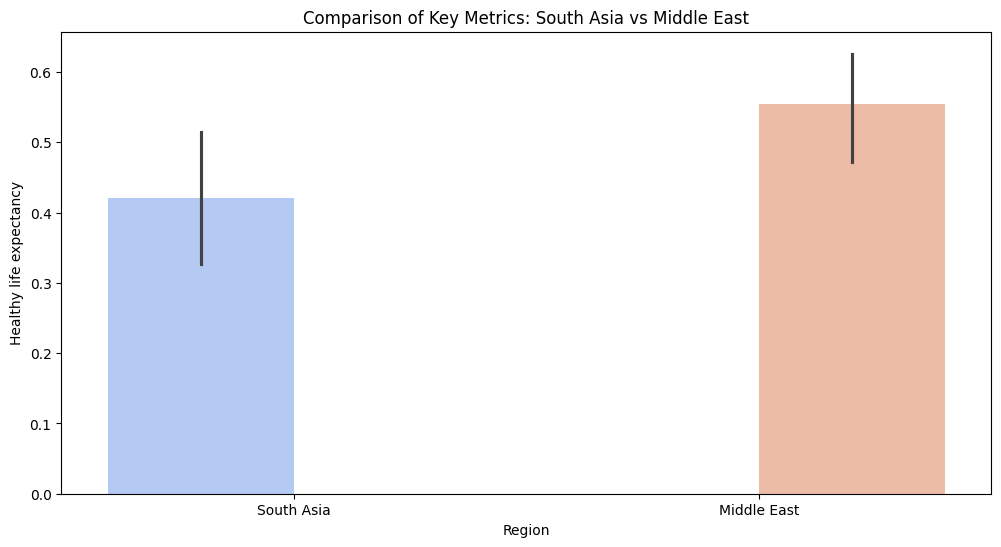

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Healthy life expectancy', data=combined_df, hue='Region', palette='coolwarm', dodge=True)
plt.title('Comparison of Key Metrics: South Asia vs Middle East')
plt.ylabel('Healthy life expectancy')
plt.xlabel('Region')

plt.show()

In [ ]:
south_asia_score_range = south_asia_df['score'].max() - south_asia_df['score'].min()
middle_east_score_range = middle_east_df['score'].max() - middle_east_df['score'].min()

In [ ]:
south_asia_mean_score = south_asia_df['score'].mean()
south_asia_std_score = south_asia_df['score'].std()
south_asia_cv = (south_asia_std_score / south_asia_mean_score) * 100

middle_east_mean_score = middle_east_df['score'].mean()
middle_east_std_score = middle_east_df['score'].std()
middle_east_cv = (middle_east_std_score / middle_east_mean_score) * 100

In [ ]:
print(f"South Asia - Range: {south_asia_score_range}, CV: {south_asia_cv:.2f}%")
print(f"Middle East - Range: {middle_east_score_range}, CV: {middle_east_cv:.2f}%")

if south_asia_cv > middle_east_cv:
    print("South Asia has greater variability in happiness.")
else:
    print("Middle East has greater variability in happiness.")

South Asia - Range: 3.4370000000000003, CV: 30.21%
Middle East - Range: 4.634, CV: 28.94%
South Asia has greater variability in happiness.


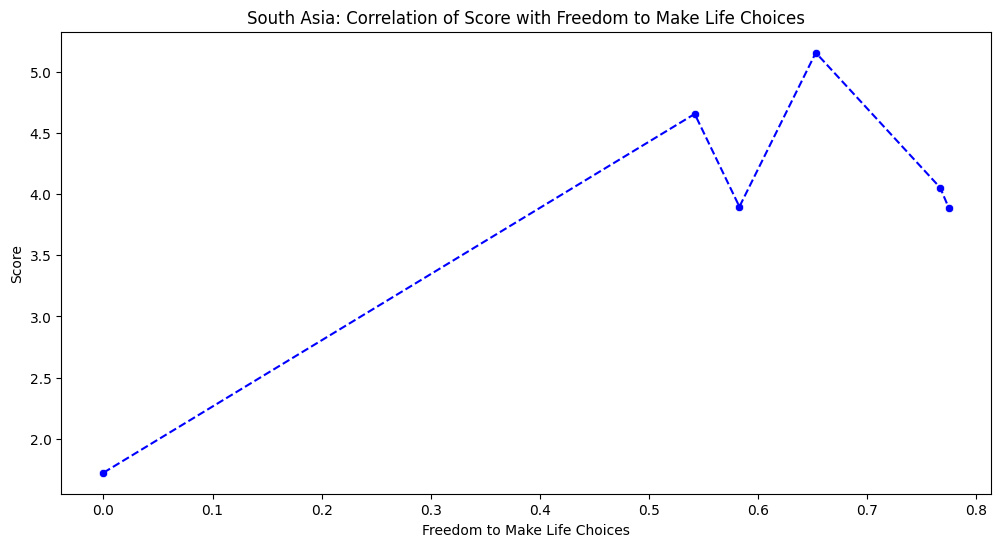

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Freedom to make life choices', y='score', data=south_asia_df, color='blue')
sns.lineplot(x='Freedom to make life choices', y='score', data=south_asia_df, color='blue', linestyle='--')
plt.title('South Asia: Correlation of Score with Freedom to Make Life Choices')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')
plt.show()


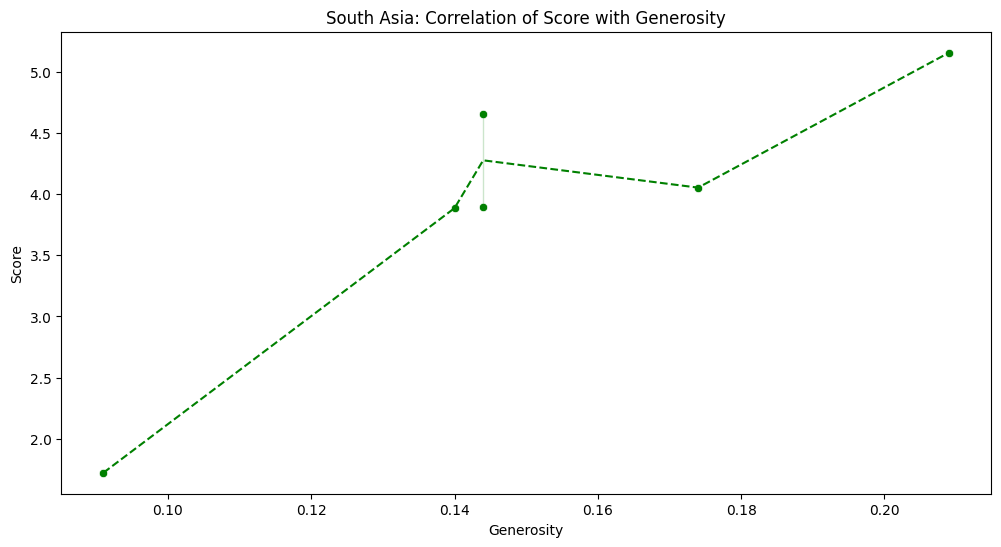

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Generosity', y='score', data=south_asia_df, color='green')
sns.lineplot(x='Generosity', y='score', data=south_asia_df, color='green', linestyle='--')
plt.title('South Asia: Correlation of Score with Generosity')
plt.xlabel('Generosity')
plt.ylabel('Score')
plt.show()

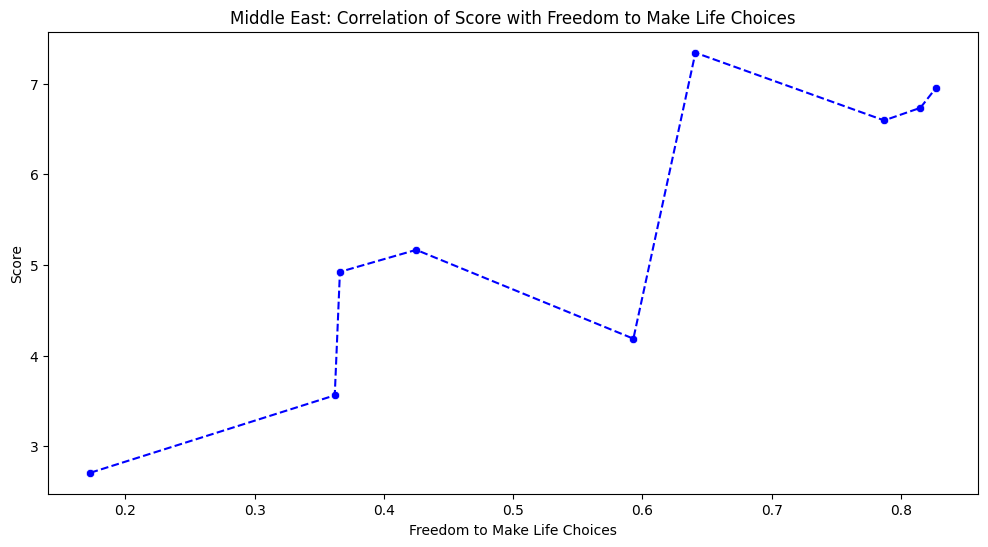

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Freedom to make life choices', y='score', data=middle_east_df, color='blue')
sns.lineplot(x='Freedom to make life choices', y='score', data=middle_east_df, color='blue', linestyle='--')
plt.title('Middle East: Correlation of Score with Freedom to Make Life Choices')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')
plt.show()

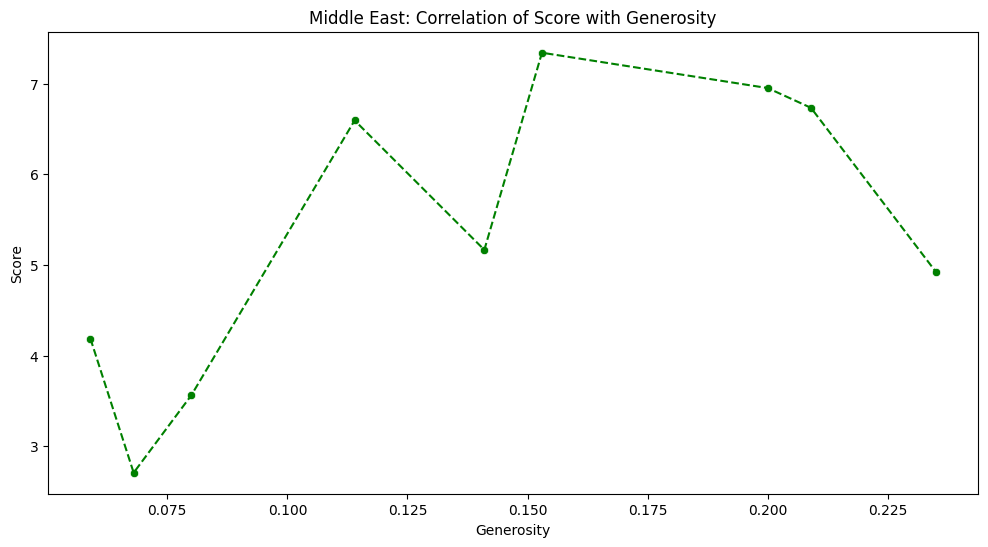

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Generosity', y='score', data=middle_east_df, color='green')
sns.lineplot(x='Generosity', y='score', data=middle_east_df, color='green', linestyle='--')
plt.title('Middle East: Correlation of Score with Generosity')
plt.xlabel('Generosity')
plt.ylabel('Score')
plt.show()

In [ ]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

In [ ]:
south_asia_outliers_score = detect_outliers(south_asia_df, 'score')
south_asia_outliers_gdp = detect_outliers(south_asia_df, 'Log GDP per capita')


In [ ]:
middle_east_outliers_score = detect_outliers(middle_east_df, 'score')
middle_east_outliers_gdp = detect_outliers(middle_east_df, 'Log GDP per capita')

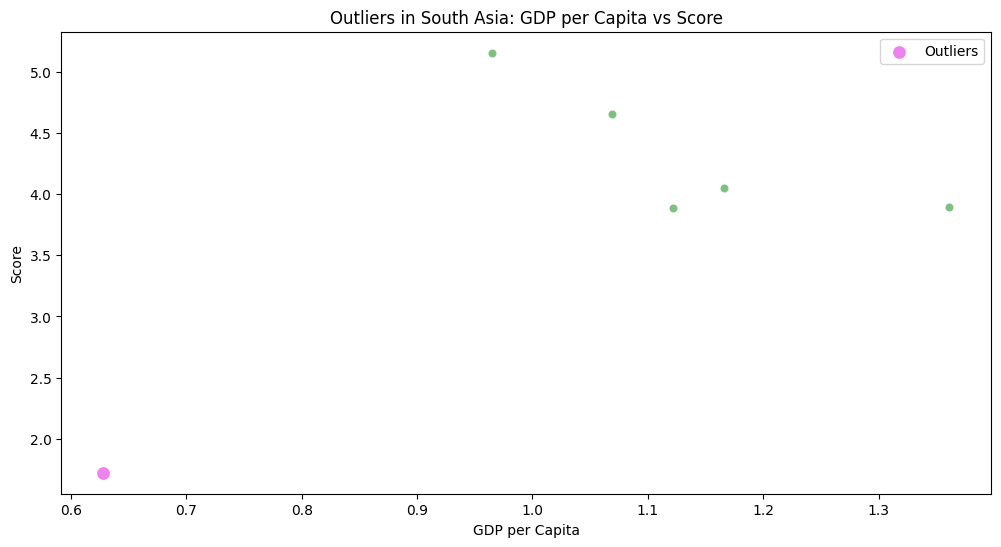

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asia_df, alpha=0.5, color='green')
# Highlight outliers
sns.scatterplot(x=south_asia_outliers_gdp['Log GDP per capita'], y=south_asia_outliers_gdp['score'], color='violet', s=100, label='Outliers')
plt.title('Outliers in South Asia: GDP per Capita vs Score')
plt.xlabel('GDP per Capita')
plt.ylabel('Score')
plt.legend()
plt.show()

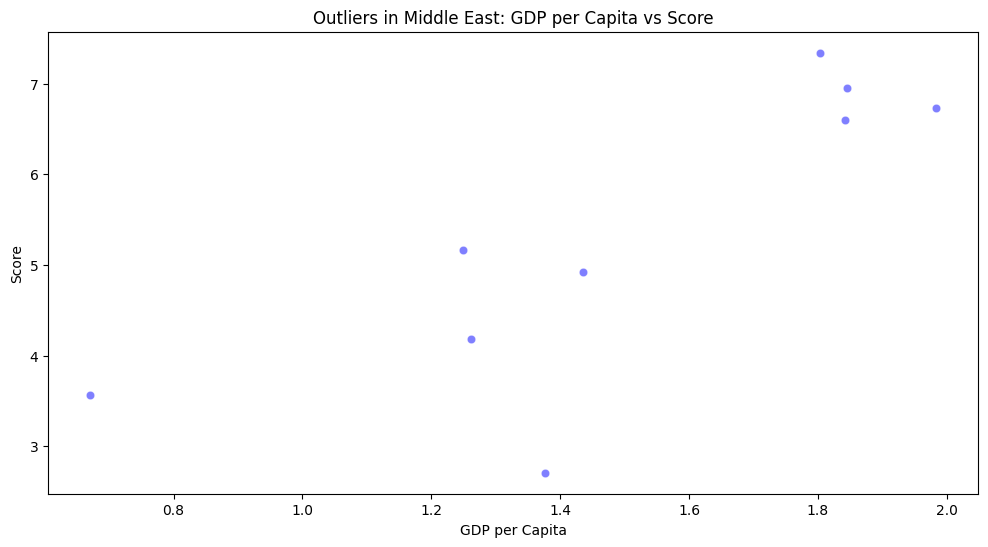

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=middle_east_df, alpha=0.5, color='blue')
# Highlight outliers
sns.scatterplot(x=middle_east_outliers_gdp['Log GDP per capita'], y=middle_east_outliers_gdp['score'], color='red', s=100, label='Outliers')
plt.title('Outliers in Middle East: GDP per Capita vs Score')
plt.xlabel('GDP per Capita')
plt.ylabel('Score')
plt.show()

In [ ]:
print("Discussion :")
print("\nSouth Asia Outliers:")
if len(south_asia_outliers_score) > 0:
    for index, row in south_asia_outliers_score.iterrows():
        print(f"Outlier Country: {row['Country name']}, Score: {row['score']}, GDP per Capita: {row['Log GDP per capita']}")
else:
    print("No outliers found based on Score in South Asia.")

print("Middle East Outliers:")
if len(middle_east_outliers_score) > 0:
    for index, row in middle_east_outliers_score.iterrows():
        print(f"Outlier Country: {row['Country name']}, Score: {row['score']}, GDP per Capita: {row['Log GDP per capita']}")
else:
    print("No outliers found based on Score in Middle East.")

Discussion :

South Asia Outliers:
Outlier Country: Afghanistan, Score: 1.721, GDP per Capita: 0.628
Middle East Outliers:
No outliers found based on Score in Middle East.


In [ ]:
combined_df = pd.concat([south_asia_df.assign(Region='South Asia'),
                         middle_east_df.assign(Region='Middle East')])

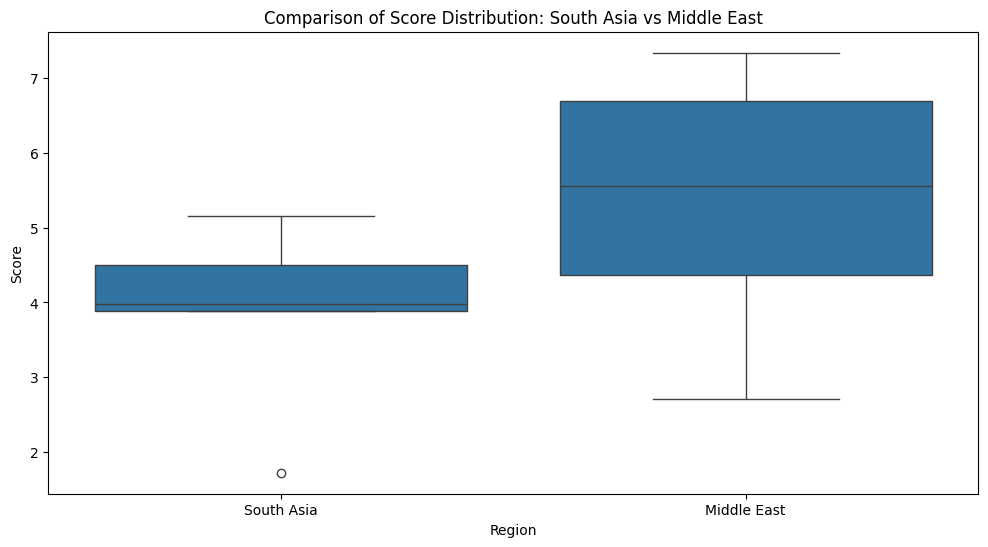

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='score', data=combined_df)
plt.title('Comparison of Score Distribution: South Asia vs Middle East')
plt.ylabel('Score')
plt.xlabel('Region')
plt.show()

In [ ]:
print("Interpretation:")
print("\nKey Differences:")
print("Distribution Shape:")
print("South Asia: Generally, the distribution appears to be wider with more variance.")
print("Middle East: Tends to have a narrower distribution with less variance.")
print("\nMedian Values:")
print("South Asia: The median Score is relatively lower, indicating a more widespread variation among countries.")
print("Middle East: The median Score is higher, suggesting that scores are more concentrated around the average value.")
print("\nOutliers:")
print("South Asia: There are more outliers, indicating significant deviations from the typical happiness score.")
print("Middle East: Fewer outliers suggest a more uniform distribution among the countries.")

Interpretation:

Key Differences:
Distribution Shape:
South Asia: Generally, the distribution appears to be wider with more variance.
Middle East: Tends to have a narrower distribution with less variance.

Median Values:
South Asia: The median Score is relatively lower, indicating a more widespread variation among countries.
Middle East: The median Score is higher, suggesting that scores are more concentrated around the average value.

Outliers:
South Asia: There are more outliers, indicating significant deviations from the typical happiness score.
Middle East: Fewer outliers suggest a more uniform distribution among the countries.
